**Minimizing Churn Rate Through Analysis of
Financial Habits**

# Data Preprocessing

## Importing Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset

In [47]:
dataset = pd.read_csv('churn_data.csv')

In [48]:
dataset.shape

(27000, 31)

In [49]:
dataset.head(10)

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0
5,3120,1,32.0,R,567.0,5,3,111,5,0,227,0,0,17,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Taurus,0,0,55.0,1.83,0
6,41406,0,21.0,na,475.0,0,0,4,0,0,0,0,0,0,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Cancer,0,0,2.0,0.07,0
7,67679,0,24.0,na,NaN,0,0,2,0,0,0,0,0,0,1,0,0,0,1,0,na,0,0,0,0,Leo,0,0,1.0,0.11,0
8,21269,0,28.0,R,548.0,0,0,0,0,2,47,1,0,9,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Sagittarius,0,0,26.0,0.87,1
9,25788,0,23.0,na,658.0,1,0,87,1,0,125,0,0,3,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Aquarius,0,0,32.0,1.07,0


In [50]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [51]:
dataset.describe()
# From describe we can see we have missing values

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,0.050630,0.013111,8.197852,0.952481,0.606074,0.561741,0.393926,0.587259,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,0.871366,0.238158,12.497243,0.212749,0.488628,0.496183,0.488628,0.492336,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,27.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [52]:
dataset.isna().any() # To verify if there's missing values

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [53]:
dataset.isna().sum() # To count the missing values to each column

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [54]:
# Cleaning the Missing values
dataset = dataset[pd.notnull(dataset['age'])]
dataset = dataset.drop(columns= ['credit_score', 'rewards_earned'])

In [55]:
dataset.shape # we missed two columns, it's not a good signe 

(26996, 29)

## Histograms

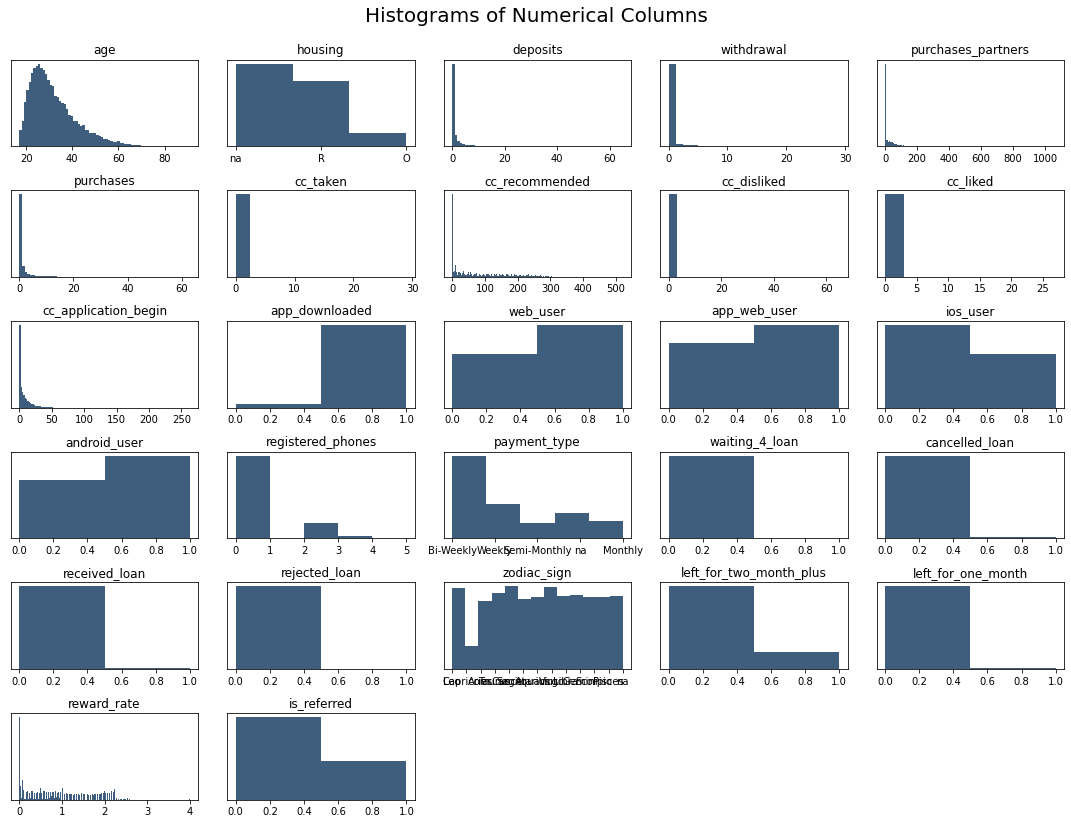

In [11]:
dataset2 = dataset.drop(columns = ['user', 'churn'])
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## Pie Chart
For the biniries values

In [12]:
# Setting biniries valeus into dataset2 
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

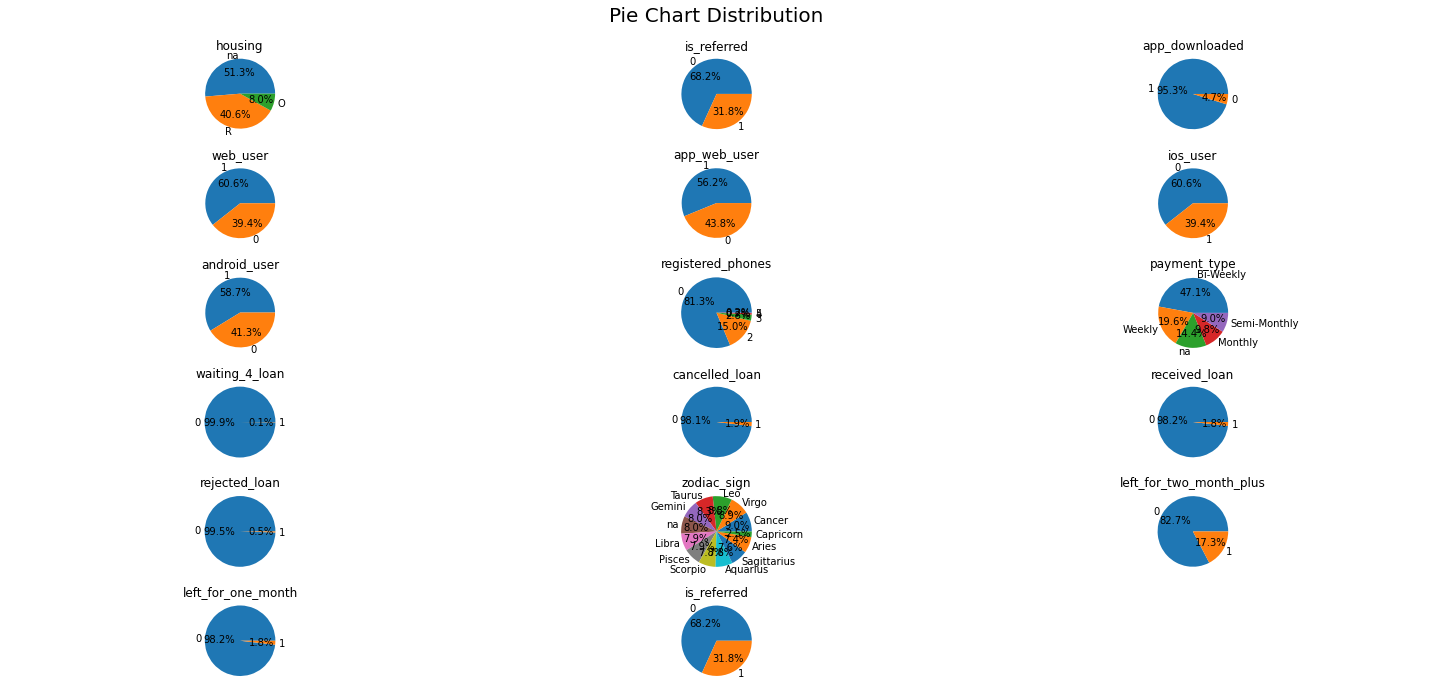

In [13]:
# Setting the plot
fig = plt.figure(figsize=(20,10))
plt.suptitle('Pie Chart Distribution', fontsize = 20)
for i in range(1, dataset2.shape[1] + 1):
  plt.subplot(6, 3, i)
  f = plt.gca()
  f.axes.get_yaxis().set_visible(False)
  f.set_title(dataset2.columns.values[i - 1])
  # Setting the biniries values
  values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values # to show the binirie values in parcentage
  index = dataset2.iloc[:, i -1].value_counts(normalize = True).index
  plt.pie(values, labels= index, autopct='%1.1f%%')
  plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])


## Exploring Uneven Features
As we can see there are some biniries variables that are uneven in your proportions. To avois bias results, we creat a mask to verify the relation of these number with the response variable

In [14]:
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [15]:
dataset[dataset2.rejected_loan == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [16]:
dataset[dataset2.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [17]:
dataset[dataset2.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [18]:
dataset[dataset2.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

## Correlation plot in according with the response variable

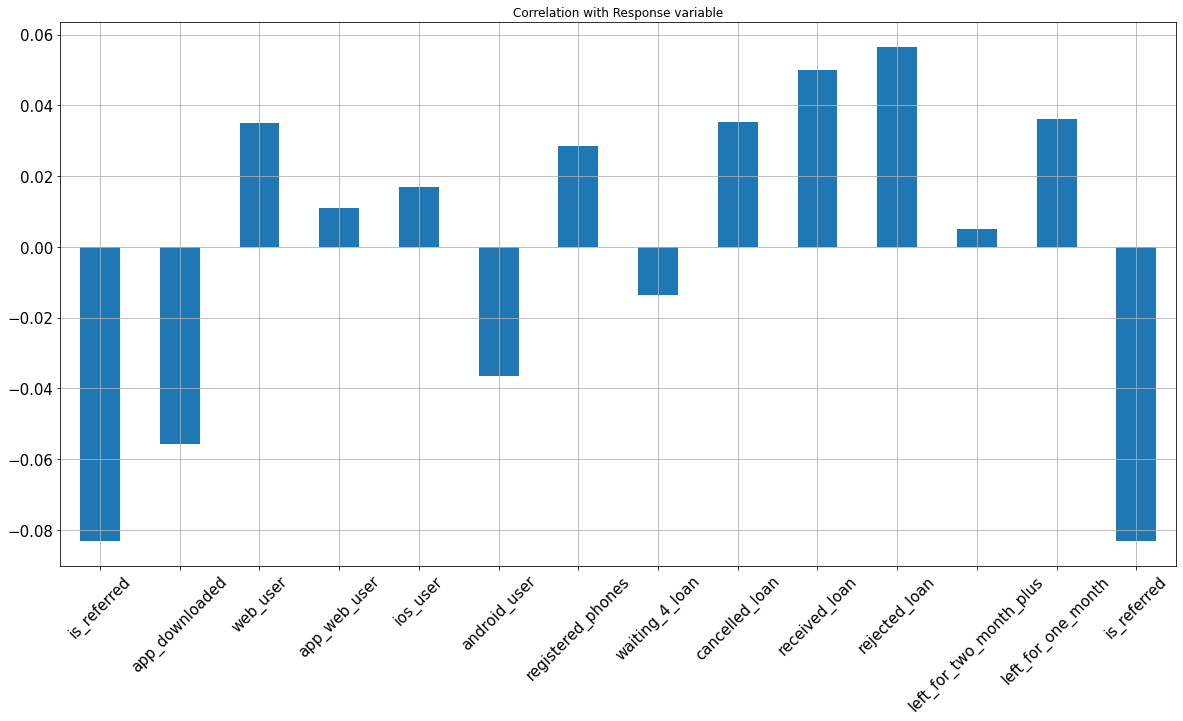

In [19]:
dataset2.drop(columns = ['housing', 'payment_type',
                         'zodiac_sign']
    ).corrwith(dataset.churn).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 45,
              grid = True)


## Correlation Matrix between all numerics variables

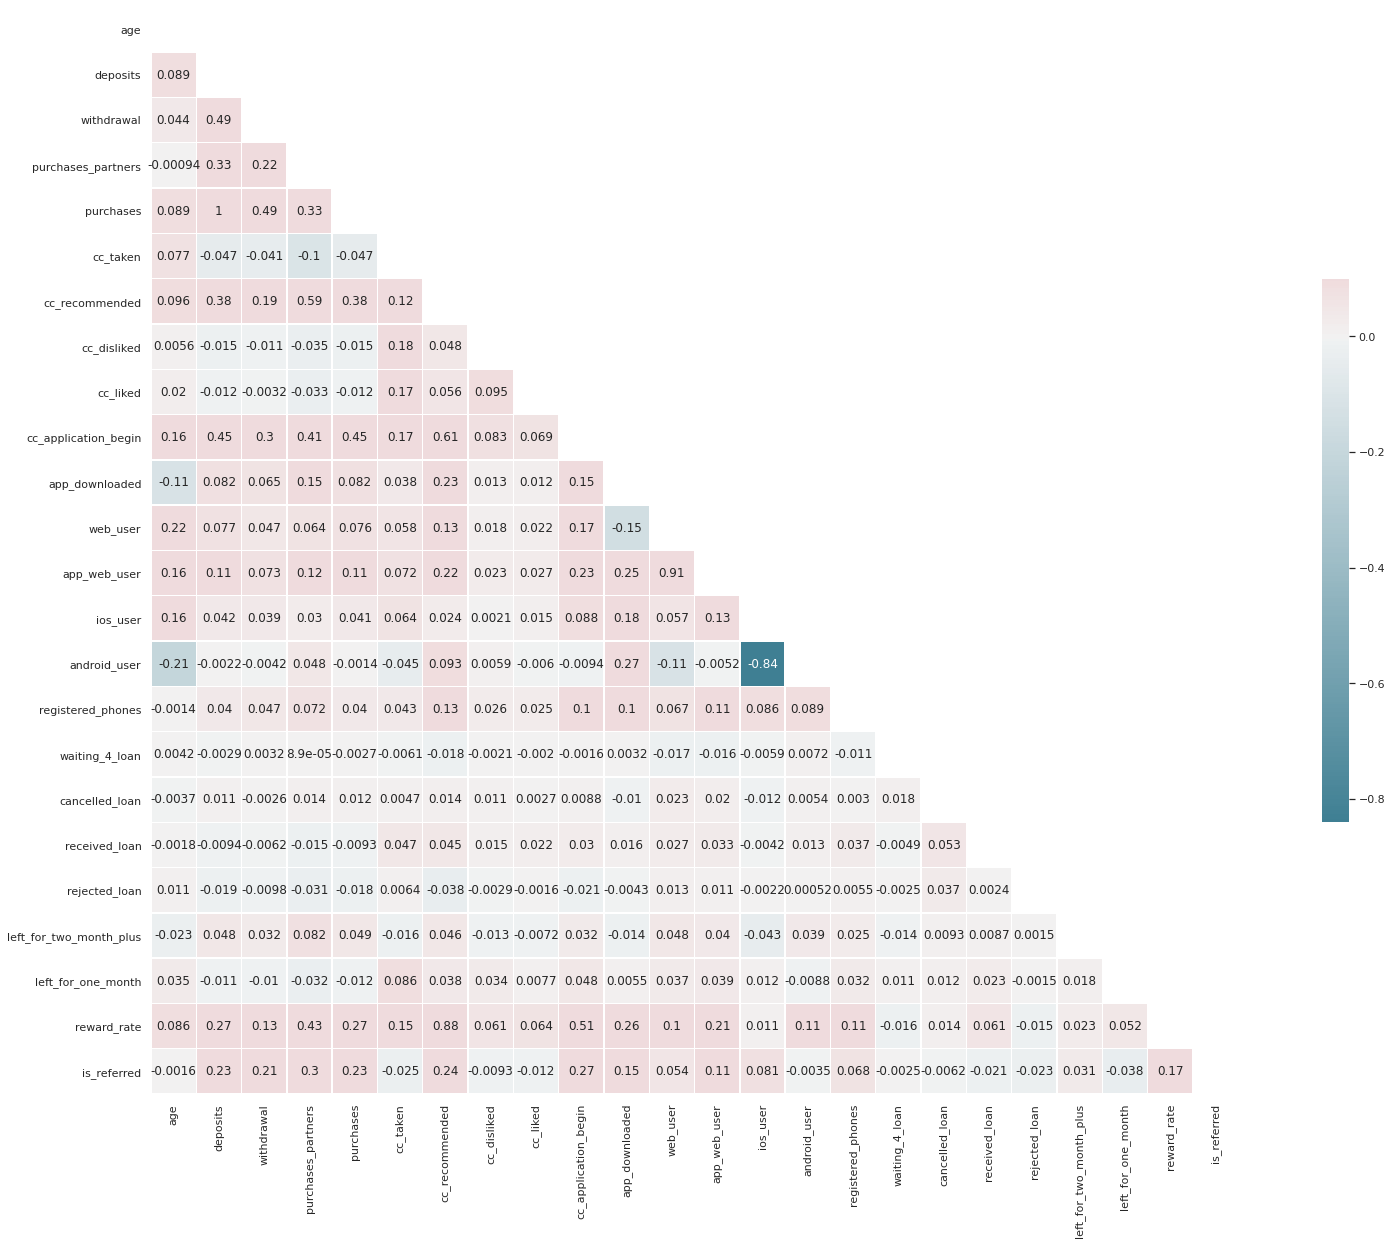

In [20]:
sns.set(style="white")

# Compute the correlation matrix
corr = dataset.drop(columns = ['user', 'churn']).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [21]:
# Removing Correleted field
dataset = dataset.drop(columns = ['app_web_user'])

In [22]:
# Savind the new dataset
dataset.to_csv('new_churn_data.csv', index_label=False)

# Model Building

## Importing the new dataset

In [23]:
dataset_model = pd.read_csv('new_churn_data.csv')

In [24]:
dataset_model.shape


(26996, 28)

## Separating user column from the dataset

In [25]:
user_identifier = dataset_model['user']
dataset_model = dataset_model.drop(columns=['user'])

## One-Hot-Encoding

In [26]:
dataset_model.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [27]:
dataset_model.groupby('housing')['churn'].nunique().reset_index()

,housing,churn
0,O,2
1,R,2
2,na,2


In [28]:
dataset_model = pd.get_dummies(dataset_model)

In [29]:
dataset_model.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [30]:
dataset_model = dataset_model.drop(columns=['zodiac_sign_na', 'housing_na', 'payment_type_na'])

In [31]:
dataset_model.shape

(26996, 42)

## Splitting the dataset into the Training set and Test set

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset_model.drop(columns=['churn']), dataset_model['churn'], test_size = 0.2, random_state = 0)

In [33]:
X_train.shape

(21596, 41)

In [34]:
17880 + 5400

23280

In [35]:
X_test.shape

(5400, 41)

In [36]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

## Balancing the training set (This can change the reality of the model -GRANDE MERDA PODE SER FEITA NESSA PORRA)

In [37]:
pos_index = y_train[y_train.values == 1].index
print(pos_index)

Int64Index([11697, 19770,  8356, 17887, 25153,   730, 23233, 20080, 21018,
             5561,
            ...
            24156, 18610, 10329, 18987, 17093, 15836, 14938, 20761, 24279,
            13126],
           dtype='int64', length=8940)


In [38]:
neg_index = y_train[y_train.values == 0].index
print(neg_index)

Int64Index([11572, 14318, 16715, 23448, 17160,  9827, 25657,  7662, 23739,
             1992,
            ...
             6746, 15433, 14119, 22262,  9227, 21247, 19652,  9847, 10801,
             2733],
           dtype='int64', length=12656)


In [39]:
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

In [40]:
higher.shape

(12656,)

In [41]:
lower.shape

(8940,)

In [42]:
import random
random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

In [43]:
X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

In [44]:
y_train.shape

(17880,)

In [45]:
y_train.value_counts()

1    8940
0    8940
Name: churn, dtype: int64

## Feature scaling

In [56]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

## Constructing the models

In [57]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, y_train)

# K Nearest Nieghbors

from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors= 5, metric='minkowski', p = 2)
classifier2.fit(X_train, y_train)

# Support Vector Machine - Linear Classifier

from sklearn.svm import SVC
classifier3 = SVC(kernel= 'linear', random_state=0)
classifier3.fit(X_train, y_train)

# Kernel Support Vector Machine

from sklearn.svm import SVC
classifier4 = SVC(kernel='rbf', random_state=0)
classifier4.fit(X_train, y_train)

# Naïves Bayes Classification

from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(X_train, y_train)

# Decision Tree Classification

from sklearn.tree import DecisionTreeClassifier
classifier6 = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier6.fit(X_train, y_train)

# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
classifier7 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
classifier7.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Predicting new results

In [58]:
y_pred1 = classifier1.predict(X_test)
y_pred2 = classifier2.predict(X_test)
y_pred3 = classifier3.predict(X_test)
y_pred4 = classifier4.predict(X_test)
y_pred5 = classifier5.predict(X_test)
y_pred6 = classifier5.predict(X_test)
y_pred7 = classifier7.predict(X_test)

## Selection Model

### Confusion Matrix and accuracies response

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)
cm4 = confusion_matrix(y_test, y_pred4)
cm5 = confusion_matrix(y_test, y_pred5)
cm6 = confusion_matrix(y_test, y_pred6)
cm7 = confusion_matrix(y_test, y_pred7)
print('Checking Confusion Matrix to a single observation')
print('Logistic Regression Classification')
print(cm1)
print(classification_report(y_test,y_pred1))
print('\n')
print('K Nearest Neighbors')
print(cm2)
print(classification_report(y_test,y_pred2))
print('\n')
print('Support Vector Machine')
print(cm3)
print(classification_report(y_test,y_pred3))
print('\n')
print('Kernel Support Vector Machine')
print(cm4)
print(classification_report(y_test,y_pred4))
print('\n')
print('Naive Bayes Classification')
print(cm5)
print(classification_report(y_test,y_pred5))
print('\n')
print('Decision Tree Classification')
print(cm6)
print(classification_report(y_test,y_pred6))
print('\n')
print('Random Forest Classification')
print(cm7)
print(classification_report(y_test,y_pred7))
print('\n')


Checking Confusion Matrix to a single observation
Logistic Regression Classification
[[1662 1504]
 [ 581 1653]]
              precision    recall  f1-score   support

           0       0.74      0.52      0.61      3166
           1       0.52      0.74      0.61      2234

    accuracy                           0.61      5400
   macro avg       0.63      0.63      0.61      5400
weighted avg       0.65      0.61      0.61      5400



K Nearest Neighbors
[[1790 1376]
 [ 888 1346]]
              precision    recall  f1-score   support

           0       0.67      0.57      0.61      3166
           1       0.49      0.60      0.54      2234

    accuracy                           0.58      5400
   macro avg       0.58      0.58      0.58      5400
weighted avg       0.60      0.58      0.58      5400



Support Vector Machine
[[1285 1881]
 [ 375 1859]]
              precision    recall  f1-score   support

           0       0.77      0.41      0.53      3166
           1       0.50 

### K-Fold cross validation

In [60]:
from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator = classifier1, X = X_train, y = y_train, cv = 10)
accuracies2 = cross_val_score(estimator = classifier2, X = X_train, y = y_train, cv = 10)
accuracies3 = cross_val_score(estimator = classifier3, X = X_train, y = y_train, cv = 10)
accuracies4 = cross_val_score(estimator = classifier4, X = X_train, y = y_train, cv = 10)
accuracies5 = cross_val_score(estimator = classifier5, X = X_train, y = y_train, cv = 10)
accuracies6 = cross_val_score(estimator = classifier6, X = X_train, y = y_train, cv = 10)
accuracies7 = cross_val_score(estimator = classifier7, X = X_train, y = y_train, cv = 10)

print('Checking K-Fold Cross Validation')
print('\n')
print('Logistic Regression Classification')
print("Accuracy: {:.2f} %".format(accuracies1.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies1.std()*100))
print('\n')
print('K Nearest Neighbors')
print("Accuracy: {:.2f} %".format(accuracies2.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies2.std()*100))
print('\n')
print('Support Vector Machine')
print("Accuracy: {:.2f} %".format(accuracies3.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies3.std()*100))
print('\n')
print('Kernel Support Vector Machine')
print("Accuracy: {:.2f} %".format(accuracies4.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies4.std()*100))
print('\n')
print('Naive Bayes Classification')
print("Accuracy: {:.2f} %".format(accuracies5.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies5.std()*100))
print('\n')
print('Decision Tree Classification')
print("Accuracy: {:.2f} %".format(accuracies6.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies6.std()*100))
print('\n')
print('Random Forest Classification')
print("Accuracy1: {:.2f} %".format(accuracies7.mean()*100))
print("Standard1 Deviation: {:.2f} %".format(accuracies7.std()*100))

Checking K-Fold Cross Validation


Logistic Regression Classification
Accuracy: 64.47 %
Standard Deviation: 1.01 %


K Nearest Neighbors
Accuracy: 62.66 %
Standard Deviation: 0.81 %


Support Vector Machine
Accuracy: 63.39 %
Standard Deviation: 0.86 %


Kernel Support Vector Machine
Accuracy: 67.15 %
Standard Deviation: 0.91 %


Naive Bayes Classification
Accuracy: 60.46 %
Standard Deviation: 1.44 %


Decision Tree Classification
Accuracy: 72.89 %
Standard Deviation: 1.20 %


Random Forest Classification
Accuracy1: 77.44 %
Standard1 Deviation: 0.87 %


## Boosting the model

In [61]:
param_grid1 = {'criterion': ['gini', 'entropy'], 'splitter' : ['best', 'random']}
param_grid2 = {'criterion': ['gini', 'entropy'], 'n_estimators': [10, 50, 100, 500, 1000]}

from sklearn.model_selection import GridSearchCV

grid1 = GridSearchCV(classifier6, param_grid1, cv = 10, verbose = 4)
grid2 = GridSearchCV(classifier7, param_grid2, cv = 10, verbose = 4)

class_boost_1 = grid1.fit(X_train,y_train)
class_boost_2 = grid2.fit(X_train,y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] criterion=gini, splitter=best ...................................
[CV] ....... criterion=gini, splitter=best, score=0.728, total=   0.2s
[CV] criterion=gini, splitter=best ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ....... criterion=gini, splitter=best, score=0.751, total=   0.2s
[CV] criterion=gini, splitter=best ...................................
[CV] ....... criterion=gini, splitter=best, score=0.710, total=   0.1s
[CV] criterion=gini, splitter=best ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


[CV] ....... criterion=gini, splitter=best, score=0.714, total=   0.2s
[CV] criterion=gini, splitter=best ...................................
[CV] ....... criterion=gini, splitter=best, score=0.729, total=   0.1s
[CV] criterion=gini, splitter=best ...................................
[CV] ....... criterion=gini, splitter=best, score=0.717, total=   0.2s
[CV] criterion=gini, splitter=best ...................................
[CV] ....... criterion=gini, splitter=best, score=0.729, total=   0.1s
[CV] criterion=gini, splitter=best ...................................
[CV] ....... criterion=gini, splitter=best, score=0.711, total=   0.2s
[CV] criterion=gini, splitter=best ...................................
[CV] ....... criterion=gini, splitter=best, score=0.739, total=   0.2s
[CV] criterion=gini, splitter=best ...................................
[CV] ....... criterion=gini, splitter=best, score=0.725, total=   0.2s
[CV] criterion=gini, splitter=random .................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    5.3s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] criterion=gini, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... criterion=gini, n_estimators=10, score=0.741, total=   0.3s
[CV] criterion=gini, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ..... criterion=gini, n_estimators=10, score=0.767, total=   0.3s
[CV] criterion=gini, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ..... criterion=gini, n_estimators=10, score=0.732, total=   0.2s
[CV] criterion=gini, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s


[CV] ..... criterion=gini, n_estimators=10, score=0.753, total=   0.3s
[CV] criterion=gini, n_estimators=10 .................................
[CV] ..... criterion=gini, n_estimators=10, score=0.740, total=   0.3s
[CV] criterion=gini, n_estimators=10 .................................
[CV] ..... criterion=gini, n_estimators=10, score=0.730, total=   0.3s
[CV] criterion=gini, n_estimators=10 .................................
[CV] ..... criterion=gini, n_estimators=10, score=0.752, total=   0.3s
[CV] criterion=gini, n_estimators=10 .................................
[CV] ..... criterion=gini, n_estimators=10, score=0.733, total=   0.3s
[CV] criterion=gini, n_estimators=10 .................................
[CV] ..... criterion=gini, n_estimators=10, score=0.740, total=   0.2s
[CV] criterion=gini, n_estimators=10 .................................
[CV] ..... criterion=gini, n_estimators=10, score=0.754, total=   0.3s
[CV] criterion=gini, n_estimators=50 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 14.9min finished


## Predicting boosted results

In [62]:
boost_predictions1 = class_boost_1.predict(X_test)
boost_predictions2 = class_boost_2.predict(X_test)

## Analizing the new boosted results (Confusion Matrix and Rapport Score)

              precision    recall  f1-score   support

           0       0.71      0.58      0.64      3166
           1       0.53      0.66      0.59      2234

    accuracy                           0.62      5400
   macro avg       0.62      0.62      0.62      5400
weighted avg       0.64      0.62      0.62      5400

The best parameters for Logistic Regression:
{'criterion': 'entropy', 'splitter': 'best'}


Confusion Matrix
Average Accuracy 72.89%
Standard Deviation 1.20%
              precision    recall  f1-score   support

           0       0.79      0.64      0.71      3166
           1       0.60      0.76      0.67      2234

    accuracy                           0.69      5400
   macro avg       0.69      0.70      0.69      5400
weighted avg       0.71      0.69      0.69      5400

Random Forest Classification:
{'criterion': 'gini', 'n_estimators': 500}


Confusion Matrix
Average Accuracy 78.24%
Standard Deviation 0.79%


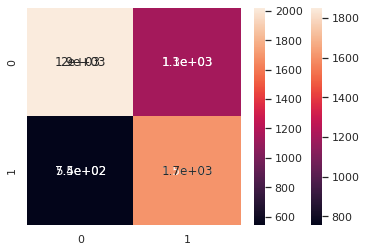

In [63]:
cmb1 = confusion_matrix(y_test, boost_predictions1)
cmb2 = confusion_matrix(y_test, boost_predictions2)

sns.heatmap(cmb1, annot=True)
print(classification_report(y_test,boost_predictions1))
print('The best parameters for Logistic Regression:')
print(grid1.best_params_)
print('\n')
print('Confusion Matrix')

print('Average Accuracy {:.2f}%'.format(grid1.best_score_ * 100))
print('Standard Deviation {:.2f}%'.format(grid1.cv_results_['std_test_score'][grid1.best_index_] * 100))

sns.heatmap(cmb2, annot=True)
print(classification_report(y_test,boost_predictions2))
print('Random Forest Classification:')
print(grid2.best_params_)
print('\n')
print('Confusion Matrix')

print('Average Accuracy {:.2f}%'.format(grid2.best_score_ * 100))
print('Standard Deviation {:.2f}%'.format(grid2.cv_results_['std_test_score'][grid2.best_index_] * 100))